In [1]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,roc_auc_score,roc_curve
import joblib
from skimpy import skim

In [2]:
data=pd.read_csv("TrafficTwoMonth.csv")


In [3]:
data.head()##displays the top 5rows

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [4]:
data.tail()## Displays the last 5 rows

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal
5951,11:45:00 PM,9,Thursday,14,3,1,15,33,low


## EDA (Exploratory Data Analysis)

In [5]:
## finding the summary of the data
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5952   │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0   ┃ p25     ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Date             │    0 │       0 │       16 │    8.945 │    1 │       8 │    16 │    24 │    31 │ ▇▇▇▇▇▇  │  │
│ │ CarCount         │    0 │       0 │    65.44 │    44.75 │    5 │   18.75 │    62 │   103 │   180 │  ▇▅▅▅▃  │  │
│ │ BikeCount        │    0 │       0 │    12.16 │    11.54 │    0 │       3 │     9 │    19 │    70 │   ▇▃▂   │  │
│ │ BusCount         │    0 │       0 │    12.91 │     12.5 │    0 │       2 │    10 │    20 │    50 │ ▇▃▃▂▁▁  │  │
│ │ TruckCount       │    0 │       0 │    18.65 │    10.97 │    0 │      10 │    18 │    27 │    60 │  ▆▇▇▅   │  │
│ │ Total            │    0 │       0 │    109.2 │       56 │   21 │      54 │   104 │   153 │   279 │  ▇▆▆▅▂  │  │
│ └──────────────────┴──────┴─────────┴──────────┴──────────┴──────┴─────────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Time                              │      0 │         0 │                         2 │                 11904 │  │
│ │ Day of the week                   │      0 │         0 │                         1 │                  5952 │  │
│ │ Traffic Situation                 │      0 │         0 │                         1 │                  5952 │  │
│ └───────────────────────────────────┴────────┴───────────┴───────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [7]:
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [8]:
# Check the column names to ensure correctness
data.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [9]:
# Display basic statistics
data_description = data.describe()
data_description

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


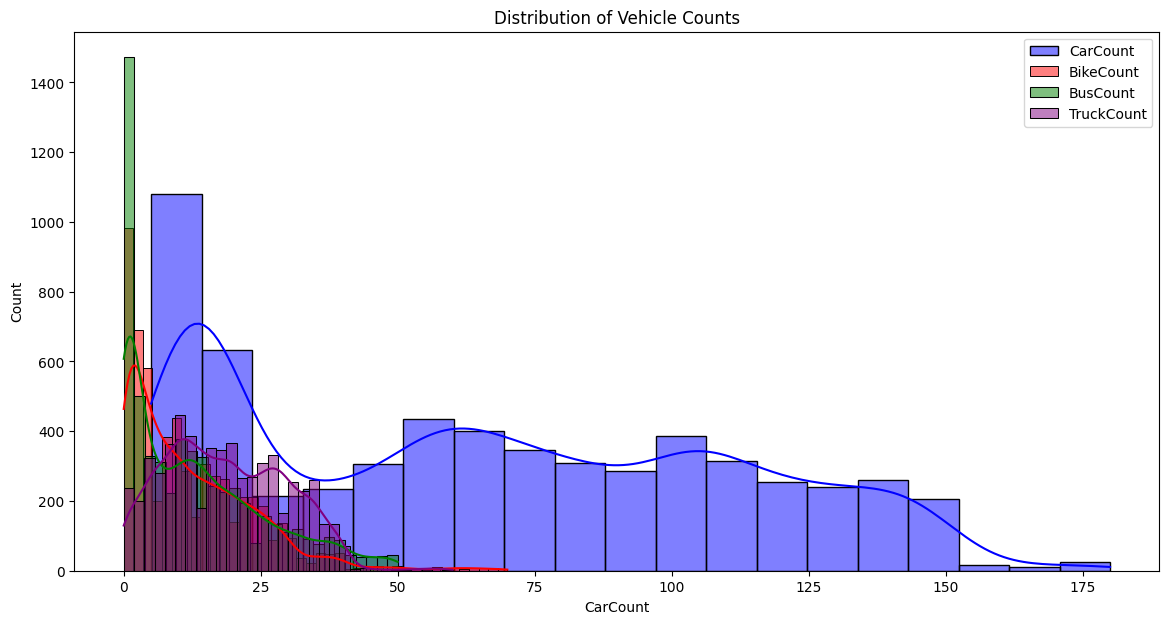

In [10]:
# Data Distribution Plots
plt.figure(figsize=(14, 7))
sns.histplot(data['CarCount'], kde=True, label='CarCount', color='blue')
sns.histplot(data['BikeCount'], kde=True, label='BikeCount', color='red')
sns.histplot(data['BusCount'], kde=True, label='BusCount', color='green')
sns.histplot(data['TruckCount'], kde=True, label='TruckCount', color='purple')
plt.legend()
plt.title('Distribution of Vehicle Counts')
plt.show()

**The diagram is a distribution plot of vehicle counts, showcasing the frequency of different vehicle types (CarCount, BikeCount, BusCount, TruckCount). The histogram bars indicate counts for each type, while the overlaid density curves illustrate the distribution trends. CarCount is the most frequent, followed by others, with notable peaks at lower counts.**

In [11]:
data_corr=data[['Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation']]
data_corr

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,Tuesday,13,2,2,24,41,normal
1,Tuesday,14,1,1,36,52,normal
2,Tuesday,10,2,2,32,46,normal
3,Tuesday,10,2,2,36,50,normal
4,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...
5947,Thursday,16,3,1,36,56,normal
5948,Thursday,11,0,1,30,42,normal
5949,Thursday,15,4,1,25,45,normal
5950,Thursday,16,5,0,27,48,normal


In [12]:
data['Traffic Situation'].value_counts()

Traffic Situation
normal    3610
heavy     1137
low        834
high       371
Name: count, dtype: int64

In [13]:

# Convert Date and Time to datetime
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.time

# Check for missing values
missing_values = data.isnull().sum()
data.head()

# Convert Time to seconds since midnight
data['Time'] = data['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [14]:

col = ['Day of the week',"Traffic Situation"]
from sklearn.preprocessing import LabelEncoder
# Initializing LabelEncoders for each column
label_encoders = {}
for column in col:
    if data[column].dtypes == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


In [15]:
### create the label for all
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")

Mapping for column 'Day of the week':
Label 0: Friday
Label 1: Monday
Label 2: Saturday
Label 3: Sunday
Label 4: Thursday
Label 5: Tuesday
Label 6: Wednesday
Mapping for column 'Traffic Situation':
Label 0: heavy
Label 1: high
Label 2: low
Label 3: normal


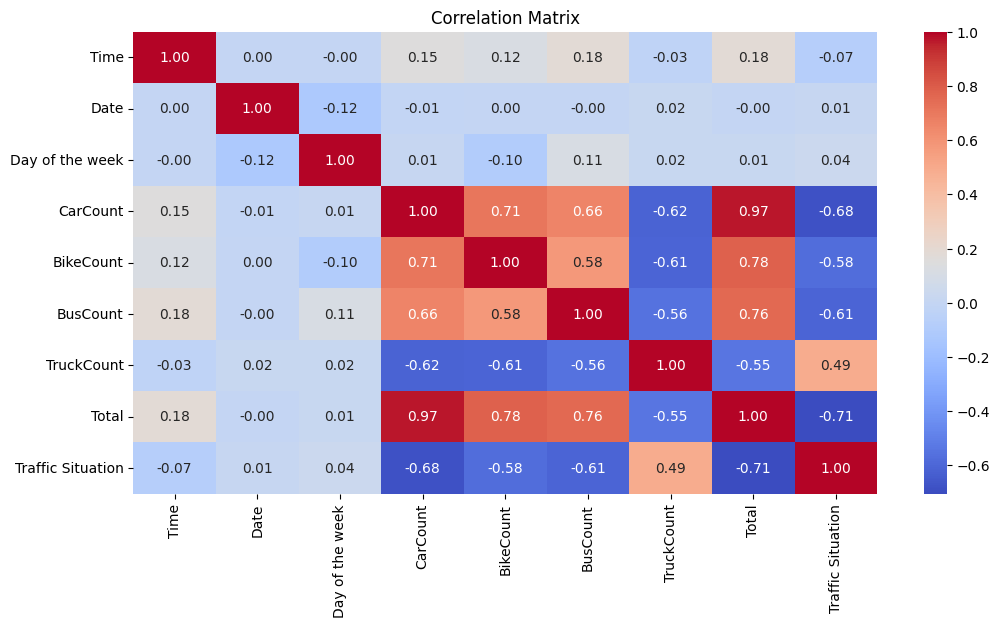

In [16]:
# Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**The diagram is a correlation matrix displaying the relationships among various traffic variables, including day of the week, vehicle counts (CarCount, BikeCount, etc.), total traffic, and traffic situation. The values range from -1 to 1, indicating strong positive (red) and negative (blue) correlations, with notable associations between CarCount and Total traffic.**

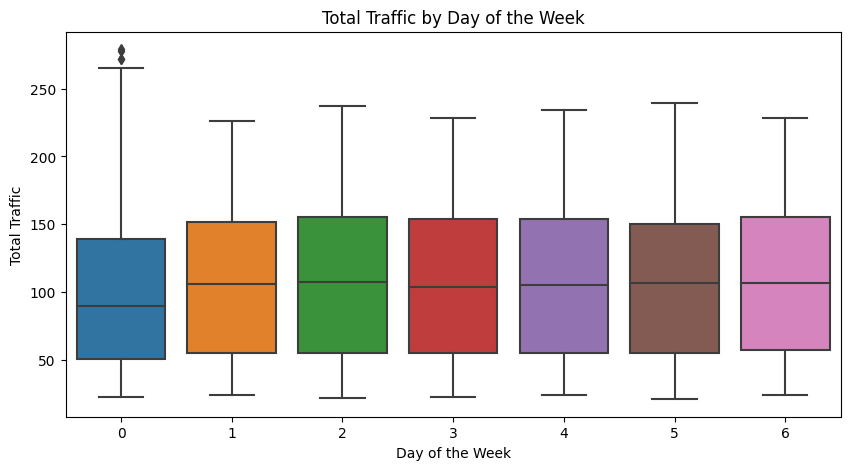

In [17]:
# Day of the Week Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='Day of the week', y='Total', data=data)
plt.title('Total Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Traffic')
plt.show()


**The diagram is a box plot illustrating total traffic counts across different days of the week, labeled from 0 to 6. Each box represents the interquartile range, with the line indicating the median. Day 0 shows a wider range and a higher median compared to other days, while other days have similar distributions.**

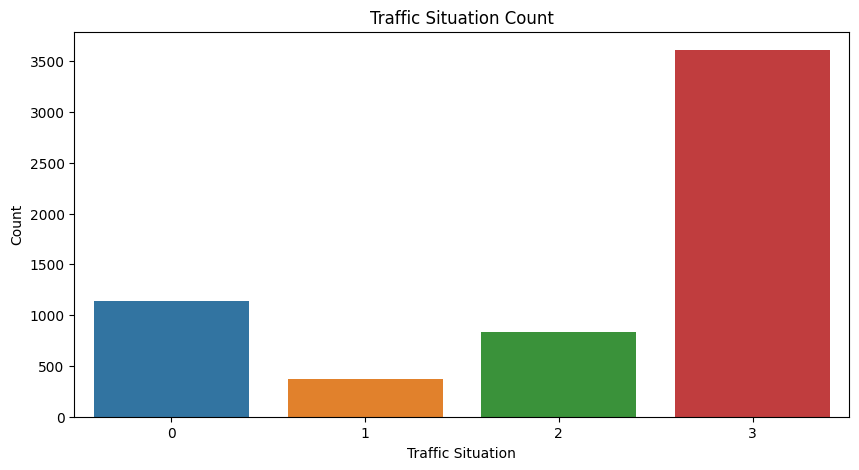

In [18]:
# Traffic Situation Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='Traffic Situation', data=data)
plt.title('Traffic Situation Count')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()


**The diagram is a bar chart illustrating the count of different traffic situations, labeled from 0 to 3. The chart shows that traffic situation 3 has the highest count, exceeding 3,500 occurrences, followed by situation 0 with around 1,000. Situations 1 and 2 have notably lower counts, indicating less frequency.**

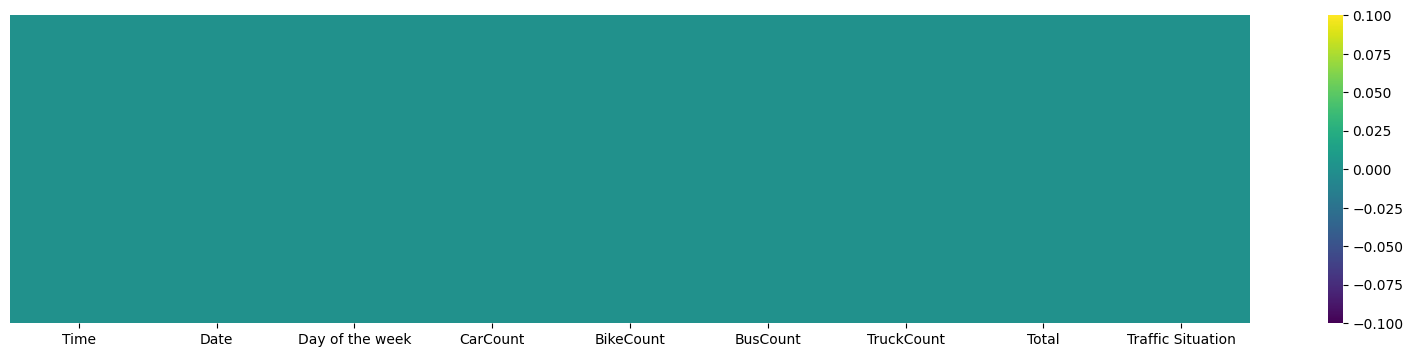

In [19]:
# plot the line plot to show the missing values
plt.figure(figsize=(20,4))
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')
plt.show()

**The diagram appears to be a correlation heatmap with no visible data, indicated by a uniform color. The x-axis includes variables such as Time, Date, and traffic counts (CarCount, BikeCount, etc.), while the y-axis seems to represent correlation values. This suggests that either data is missing or there was an error in visualization.**

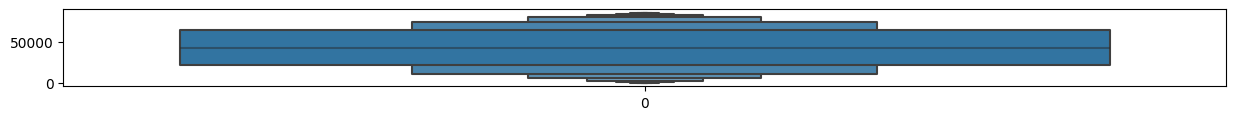

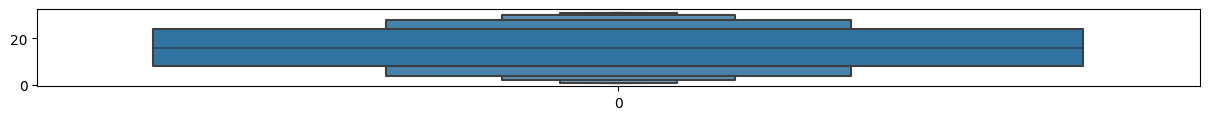

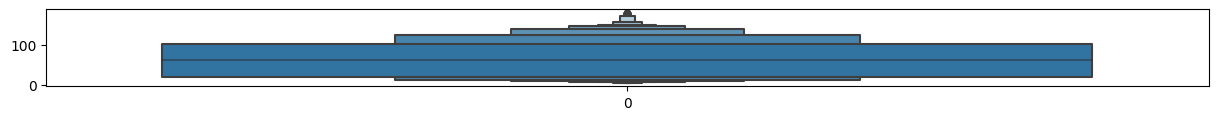

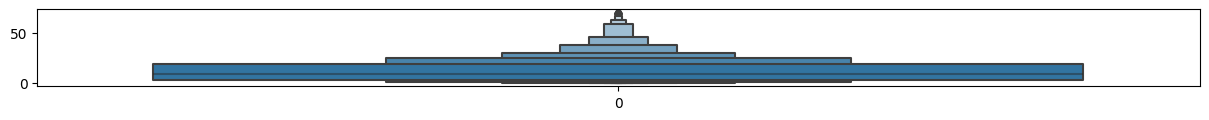

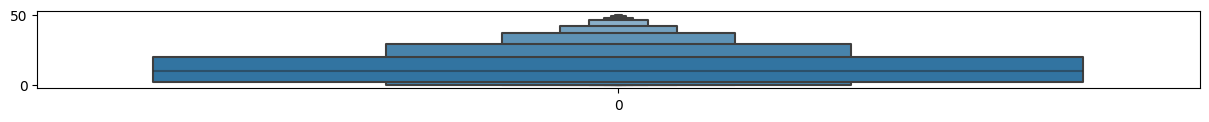

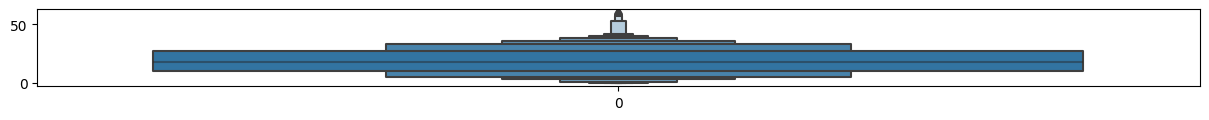

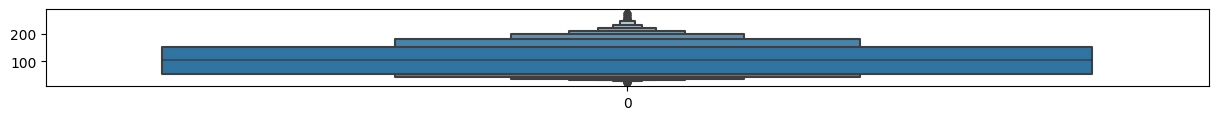

In [20]:
for i in data.select_dtypes(include='int64'):
    plt.figure(figsize=(15,1))
    sns.boxenplot(data[i])

**The diagram is a box plot representing the distribution of a dataset, with the central line indicating the median and the shaded areas showing the interquartile range. The whiskers extend to the minimum and maximum values, while there are potential outliers indicated above the maximum value, suggesting variability in the data.**

In [21]:
data.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

<Axes: xlabel='Day of the week', ylabel='count'>

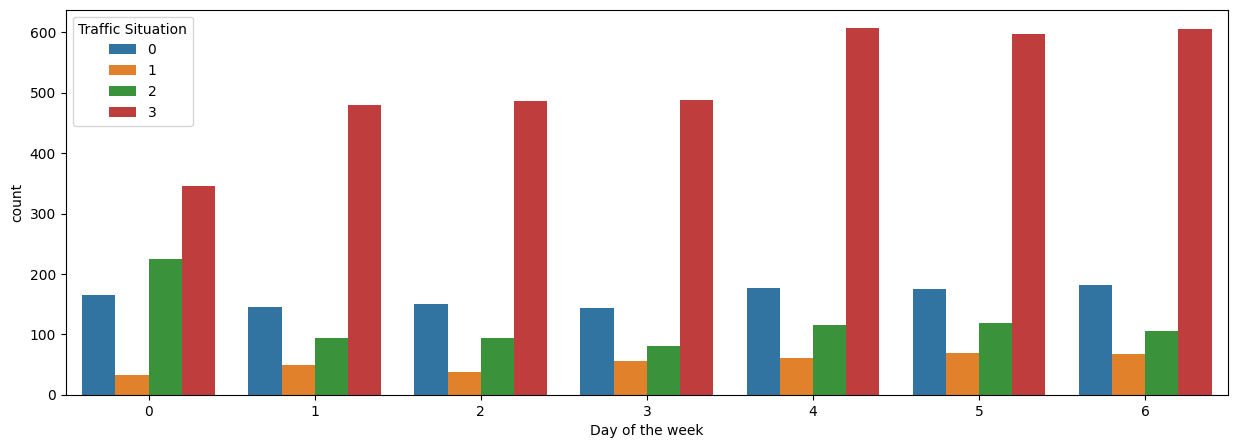

In [22]:
# plot the comparison plot for age and target columns
plt.figure(figsize=(15,5))
sns.countplot(x='Day of the week',hue='Traffic Situation',data=data)

**The diagram is a grouped bar chart depicting traffic situation counts across different days of the week (0 to 6). Each bar color represents a specific traffic situation (0 to 3). Traffic situation 3 consistently shows the highest counts, particularly on days 0, 1, and 4, indicating increased traffic severity on those days.**

## Dataset profile report

In [23]:
# import pandas as pd
# from ydata_profiling import ProfileReport


# # Create a profile report
# profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)

ImportError: cannot import name 'Mapping' from 'collections' (c:\Program Files\Python310\lib\collections\__init__.py)

In [24]:
# profile.to_notebook_iframe()

In [25]:
# profile.to_file("profile_report.html")

In [27]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,10,5,13,2,2,24,41,3
1,900,10,5,14,1,1,36,52,3
2,1800,10,5,10,2,2,32,46,3
3,2700,10,5,10,2,2,36,50,3
4,3600,10,5,11,2,1,34,48,3


In [28]:
data['Traffic Situation'].value_counts()

Traffic Situation
3    3610
0    1137
2     834
1     371
Name: count, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE
# Define features and target variable
X = data.drop(['Traffic Situation'], axis=1)
y = data['Traffic Situation']
feature_names = X.columns.tolist() 
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
# Split the balanced and normalized dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)
print("Normalized resampled dataset shape:", X_resampled.shape)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Original dataset shape: (5952, 8) (5952,)
Resampled dataset shape: (14440, 8) (14440,)
Normalized resampled dataset shape: (14440, 8)
Training set shape: (11552, 8) (11552,)
Testing set shape: (2888, 8) (2888,)


In [31]:

y_test_df = y_test.reset_index(drop=True)  # Reset index to match with X_test

# Concatenate X_test and y_test with y_test as the last column?
dt = pd.concat([X_test.reset_index(drop=True), y_test_df], axis=1)

# Save to CSV
dt.to_csv("Combined.csv", index=False)


## Existing System

## LSTM

In [32]:
#import libraries for LSTm
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
xshample1 = X_train.to_numpy()  # Convert DataFrame to NumPy array
yshample1 = y_train.to_numpy()  # Convert DataFrame to NumPy arra
# Splitting the data into training and testing parts
xtrain, xtest, ytrain, ytest = train_test_split(xshample1, yshample1, test_size=0.3, random_state=42)

# Reshape the data to fit LSTM input requirements
xtrain1 = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))
xtest1 = xtest.reshape((xtest.shape[0], xtest.shape[1], 1))

# Define the LSTM model
lstm = Sequential()

# Add LSTM layers
lstm.add(LSTM(50, return_sequences=True, input_shape=(xtrain1.shape[1], xtrain1.shape[2])))
lstm.add(LSTM(50, return_sequences=False))

# Add Dense layers
lstm.add(Dense(64, activation='relu'))
lstm.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if you have multiple classes

# Compile the model
lstm.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Use 'sparse_categorical_crossentropy' for multiple classes
              metrics=['accuracy'])

# Train the model
history = lstm.fit(xtrain1, ytrain, epochs=10, batch_size=32, validation_split=0.2)




Epoch 1/10


203/203 [==============================] - 7s 12ms/step - loss: -14.8289 - accuracy: 0.2573 - val_loss: -47.8863 - val_accuracy: 0.2454
Epoch 2/10
203/203 [==============================] - 1s 7ms/step - loss: -135.4097 - accuracy: 0.2828 - val_loss: -253.0325 - val_accuracy: 0.3974
Epoch 3/10
203/203 [==============================] - 2s 7ms/step - loss: -372.5730 - accuracy: 0.4227 - val_loss: -553.6462 - val_accuracy: 0.4042
Epoch 4/10
203/203 [==============================] - 1s 7ms/step - loss: -706.5472 - accuracy: 0.4366 - val_loss: -929.1822 - val_accuracy: 0.4808
Epoch 5/10
203/203 [==============================] - 2s 8ms/step - loss: -1122.4154 - accuracy: 0.4358 - val_loss: -1419.4814 - val_accuracy: 0.4802
Epoch 6/10
203/203 [==============================] - 1s 7ms/step - loss: -1669.7291 - accuracy: 0.4450 - val_loss: -2068.2000 - val_accuracy: 0.4462
Epoch 7/10
203/203 [==============================] - 1s 7ms/step - loss: -2302.8750 - accuracy: 0.4573 -

In [33]:
# Evaluate the model
test_loss, test_accuracy = lstm.evaluate(xtest1, ytest)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

109/109 [==============================] - 0s 3ms/step - loss: -5347.5908 - accuracy: 0.4117
Test Loss: -5347.5908
Test Accuracy: 0.4117


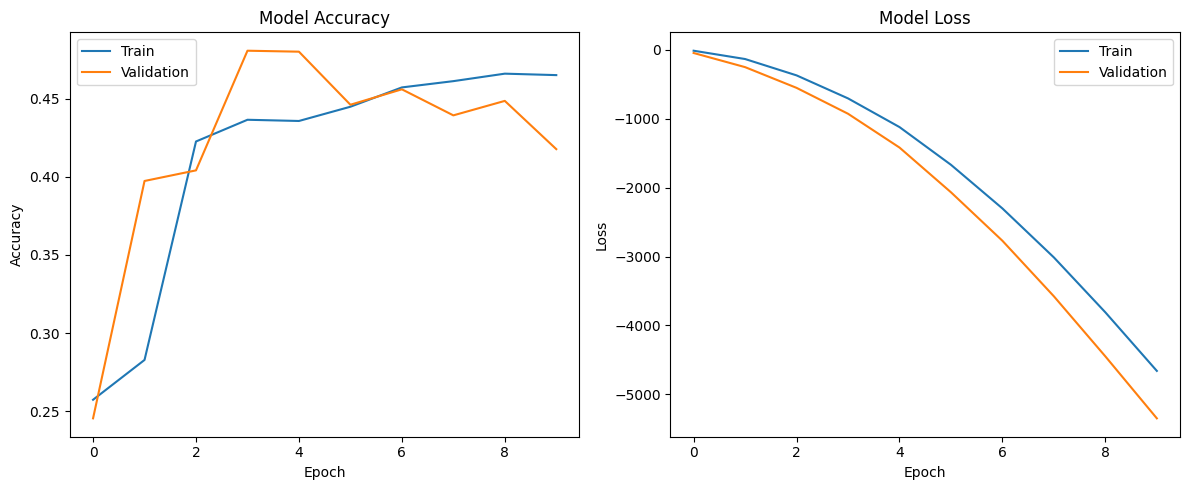

109/109 [==============================] - 1s 3ms/step


In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer

# Assuming 'history' is the output from CNN.fit()
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

# Make predictions
y_pred = lstm.predict(xtest1)
y_pred_classes = (y_pred > 0.5).astype("int32")



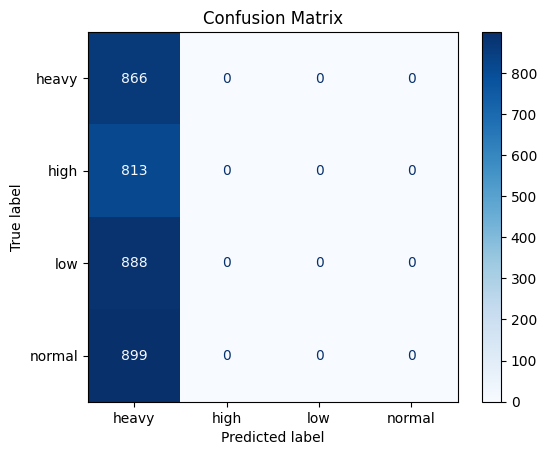

In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_pred contains probabilities (e.g., from softmax) for multiple classes
# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Assuming ytest are your true class labels
cm = confusion_matrix(ytest, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['heavy', 'high', 'low', 'normal'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [36]:
# Evaluate the model
train_loss, train_accuracy = lstm.evaluate(xtrain1, ytrain)
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")

253/253 [==============================] - 1s 3ms/step - loss: -5162.9067 - accuracy: 0.4302
Train Loss: -5162.9067
Train Accuracy: 0.4302


### LogisticRegression

In [37]:
lr = LogisticRegression()
#fitting to the model
lr.fit(X_train,y_train)
#predicton
lr_pred = lr.predict(X_train)
#accuracy score 
lr_acc = accuracy_score(y_train,lr_pred)
print("Accuracy Score of Logistic = ",lr_acc)
print('====================================================')
#finding the f1 score
lr_f1 = f1_score(y_train,lr_pred,average='macro')
print("f1 score score fo Logistic =",lr_f1)
print('====================================================')
lr_cm = confusion_matrix(y_train, lr_pred) 
print('coonfusion matrxi of Logistic =\n',lr_cm)
print('===================================================')


Accuracy Score of Logistic =  0.6017139889196675
f1 score score fo Logistic = 0.5957632899151737
coonfusion matrxi of Logistic =
 [[2615  227    0   33]
 [ 379 1687    0  803]
 [ 270  163 1183 1279]
 [ 342  550  555 1466]]


C:\Users\085\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


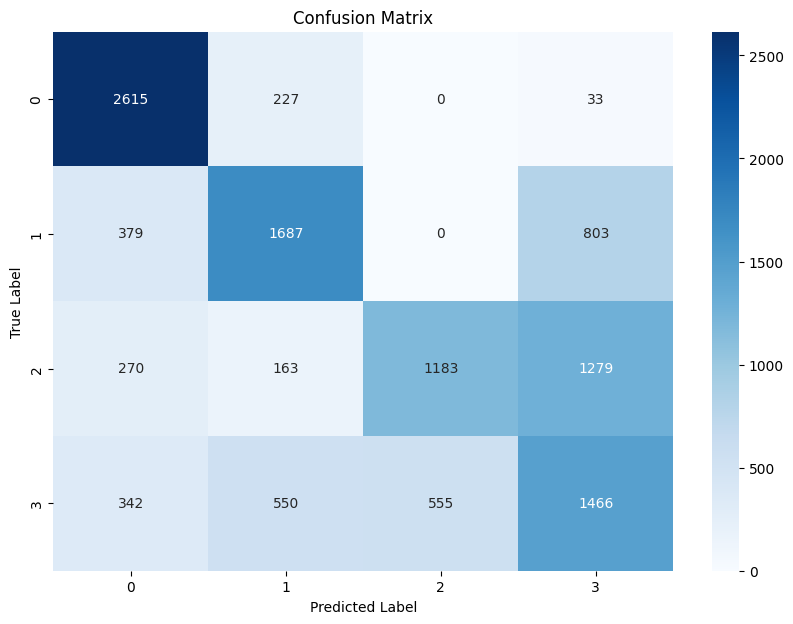

In [38]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

## Proposed System

### XGBClassifier

In [39]:
xgb = XGBClassifier()
# Train and evaluate XGBoost
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

XGBoost Accuracy: 0.996191135734072
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      0.99      1.00       741
           2       1.00      1.00      1.00       715
           3       0.99      1.00      0.99       697

    accuracy                           1.00      2888
   macro avg       1.00      1.00      1.00      2888
weighted avg       1.00      1.00      1.00      2888



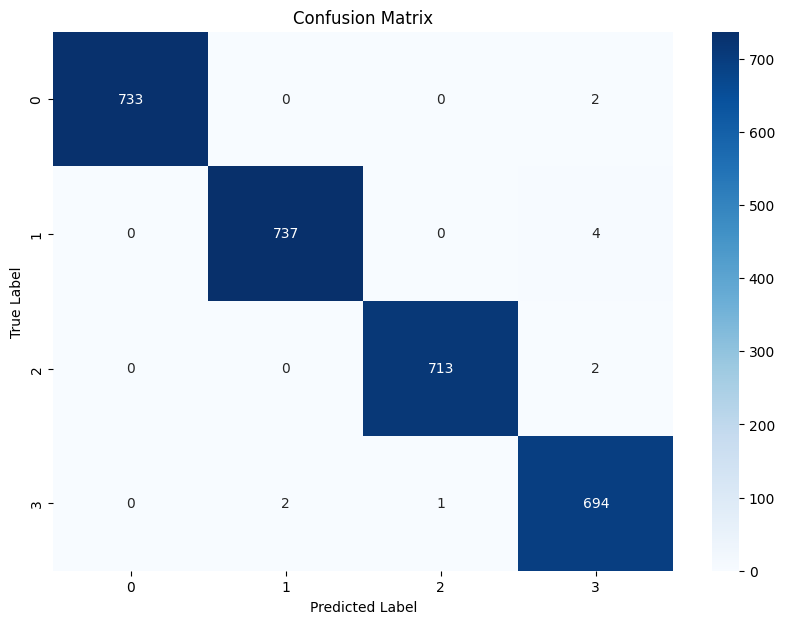

In [41]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

In [42]:
# Save the XGBoost Tree model
joblib.dump(xgb, 'XGBoost.pkl')

['XGBoost.pkl']

### RandomForestClassifier

In [43]:
# Train and evaluate RandomForest
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)


RandomForestClassifier Accuracy: 0.997229916897507
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      0.99      1.00       741
           2       1.00      1.00      1.00       715
           3       0.99      1.00      0.99       697

    accuracy                           1.00      2888
   macro avg       1.00      1.00      1.00      2888
weighted avg       1.00      1.00      1.00      2888



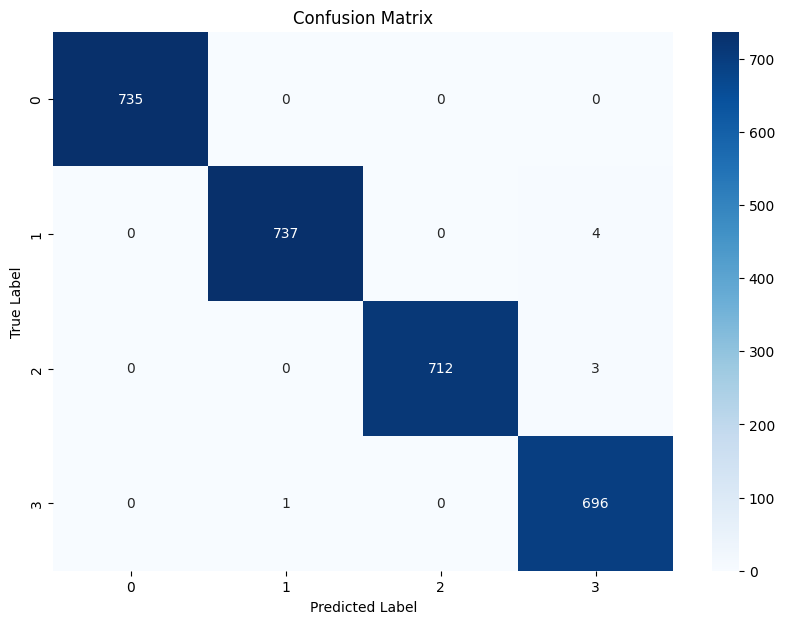

In [45]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

In [46]:
# Save the XGBoost Tree model
joblib.dump(rf, 'RandomForest.pkl')

['RandomForest.pkl']

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dtc_pred = dt.predict(X_test)

dtc_acc =accuracy_score(y_test, dtc_pred)
print("accuracy",dtc_acc)


# printing the classification report of the model
print(f'Here is the classification report of the model \n \n {classification_report(y_test,dtc_pred)}')
print('='*50)



accuracy 0.9937673130193906
Here is the classification report of the model 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       0.99      1.00      0.99       741
           2       0.99      1.00      1.00       715
           3       0.99      0.99      0.99       697

    accuracy                           0.99      2888
   macro avg       0.99      0.99      0.99      2888
weighted avg       0.99      0.99      0.99      2888



In [48]:
# printig the confusion matrix 
dtc_cm = confusion_matrix(y_test,dtc_pred)
print(f'Here is the confusion matrix of the model \n \n',dtc_cm)


Here is the confusion matrix of the model 
 
 [[732   0   0   3]
 [  0 738   0   3]
 [  0   0 713   2]
 [  0   6   4 687]]


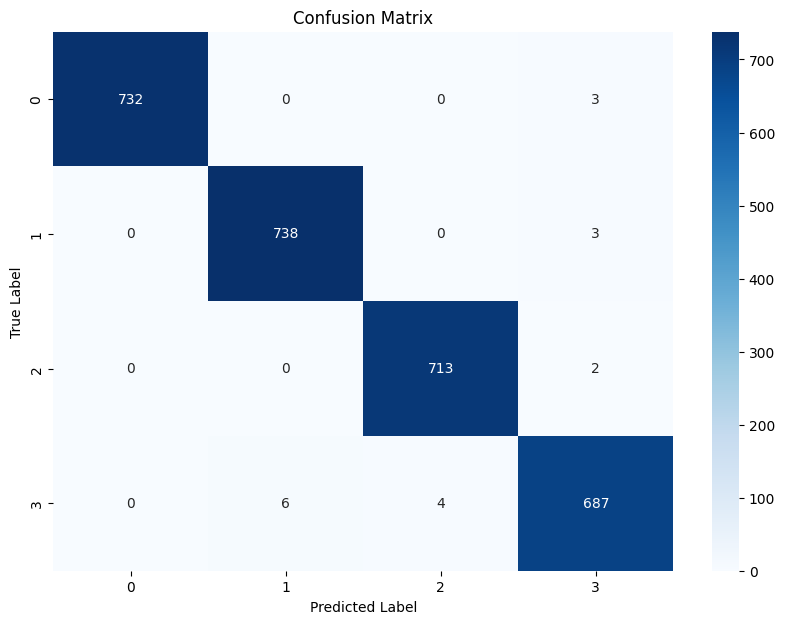

In [50]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(dtc_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

In [1]:
import plotly.graph_objects as go

# Data for Models and their Accuracies

model_names = ['DecisionTree', 'RandomForest', 'Lstm', 'XGBoost','Logistic Regression']
accuracies = [99, 99,45 ,99 ,60]

# Create the bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=model_names,
    y=accuracies,
    name='Accuracy'
))

# Set the layout
fig.update_layout(
    title='Model Accuracies',
    xaxis_title='Models',
    yaxis_title='Accuracy',
    barmode='group',
    bargroupgap=0.2
)

# Show the plot
fig.show()


In [51]:
model = joblib.load('RandomForest.pkl')
model1 = joblib.load('XGBoost.pkl')
low = [900,25,	6,13,1,0,10,24]
high = [24300,10,3,113,12,36,3,166]
normal = [38700,19,4,28,1,6,32,67]
havy = [60300,9,4,120,27,27,13,190]
predictoins = model1.predict([high])
print(predictoins)
if predictoins == 0:
    print('heavy')
elif predictoins == 1:
    print('high')
elif predictoins == 2:
    print('low')
else:
    print('normal')

[1]
high
